# Weather Predictor


Neel Roy

In [127]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 1. Introduction

For this mini-project, I decided to use a weather dataset to build a predictive model that will effectively predict precipitation, also known as Data.Precipitation in the dataset, for new datasets. To predict the precipitation response variable, I will be using 5 explanatory variables: Date.Month, Station.State, Data.Temperature.Avg Temp, Data.Wind.Direction, and Data.Wind.Speed. Secondly, I will have the model yield reliable interpretative insights about the nature of the relationship between precipitation and the explanatory variables in the dataset.

The motivation behind why someone  might want to build a predictive model that 
predict Data.Precipitation for new datasets is because people may want to find other locations with similar precipitation conditions. For example, a person or company such as a big food corporation that wants to expand to other regions may want to find out what locations would be best suitable to expand to given the required precipitation conditions needed to grow the food. This type of predictive model would be useful for them.s

## 2. Dataset Discussion

In [22]:
df = pd.read_csv('weather.csv')
df.head()

,Precipitation,Date.Full,Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,State,Temperature_AvgTemp,Temperature_MaxTemp,Temperature_MinTemp,Wind_Direction,Wind_Speed
0,0.00,1/3/2016,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,1/3/2016,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,1/3/2016,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,1/3/2016,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,1/3/2016,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [23]:
df.shape

(16743, 14)

I will be using the weather.csv dataset to answer my research questions. The dataset has 16743 rows before any data cleaning. I got this dataset from corgis-edu.github.io provided by the Mini Project 2 Specifications PDF. The dataset was downloaded on 03/29/2024. Here is the link: https://corgis-edu.github.io/corgis/csv/weather/

## 3. Dataset Cleaning

In [24]:
df.dtypes

Precipitation          float64
Date.Full               object
Month                    int64
Date.Week of             int64
Date.Year                int64
Station.City            object
Station.Code            object
Station.Location        object
State                   object
Temperature_AvgTemp      int64
Temperature_MaxTemp      int64
Temperature_MinTemp      int64
Wind_Direction           int64
Wind_Speed             float64
dtype: object

In [38]:
df = df[['Precipitation', 'Month', 'State', 'Temperature_AvgTemp', 'Wind_Direction', 'Wind_Speed']]
df = df.dropna()
df

,Precipitation,Month,State,Temperature_AvgTemp,Wind_Direction,Wind_Speed
0,0.00,1,Alabama,39,33,4.33
1,0.00,1,Alabama,39,32,3.86
2,0.16,1,Alabama,46,35,9.73
3,0.00,1,Alabama,45,32,6.86
4,0.01,1,Alaska,34,19,7.80
...,...,...,...,...,...,...
16738,0.08,1,Wyoming,23,23,19.98
16739,0.00,1,Wyoming,32,26,15.16
16740,0.00,1,Wyoming,17,26,1.65
16741,0.06,1,Wyoming,23,24,18.16


In [39]:
df.shape

(16743, 6)

According to the df.dtypes, all the data types match the data type used in each column of the weather.csv data. We can assume that it is unlikely that there are any implicit missing values in the dataset. After using df.dropna() to drop explicit NaN values, no rows in our dataset were dropped which means that there are no explicit missing values present in our dataset. I also took out the the other variables we are not using to build our predictive model. After cleaning the dataset, we are ready to use the dataset to perform preliminary analysis.

## 4. Preliminary Analysis

C:\Users\Neelesh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Neelesh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Neelesh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Neelesh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

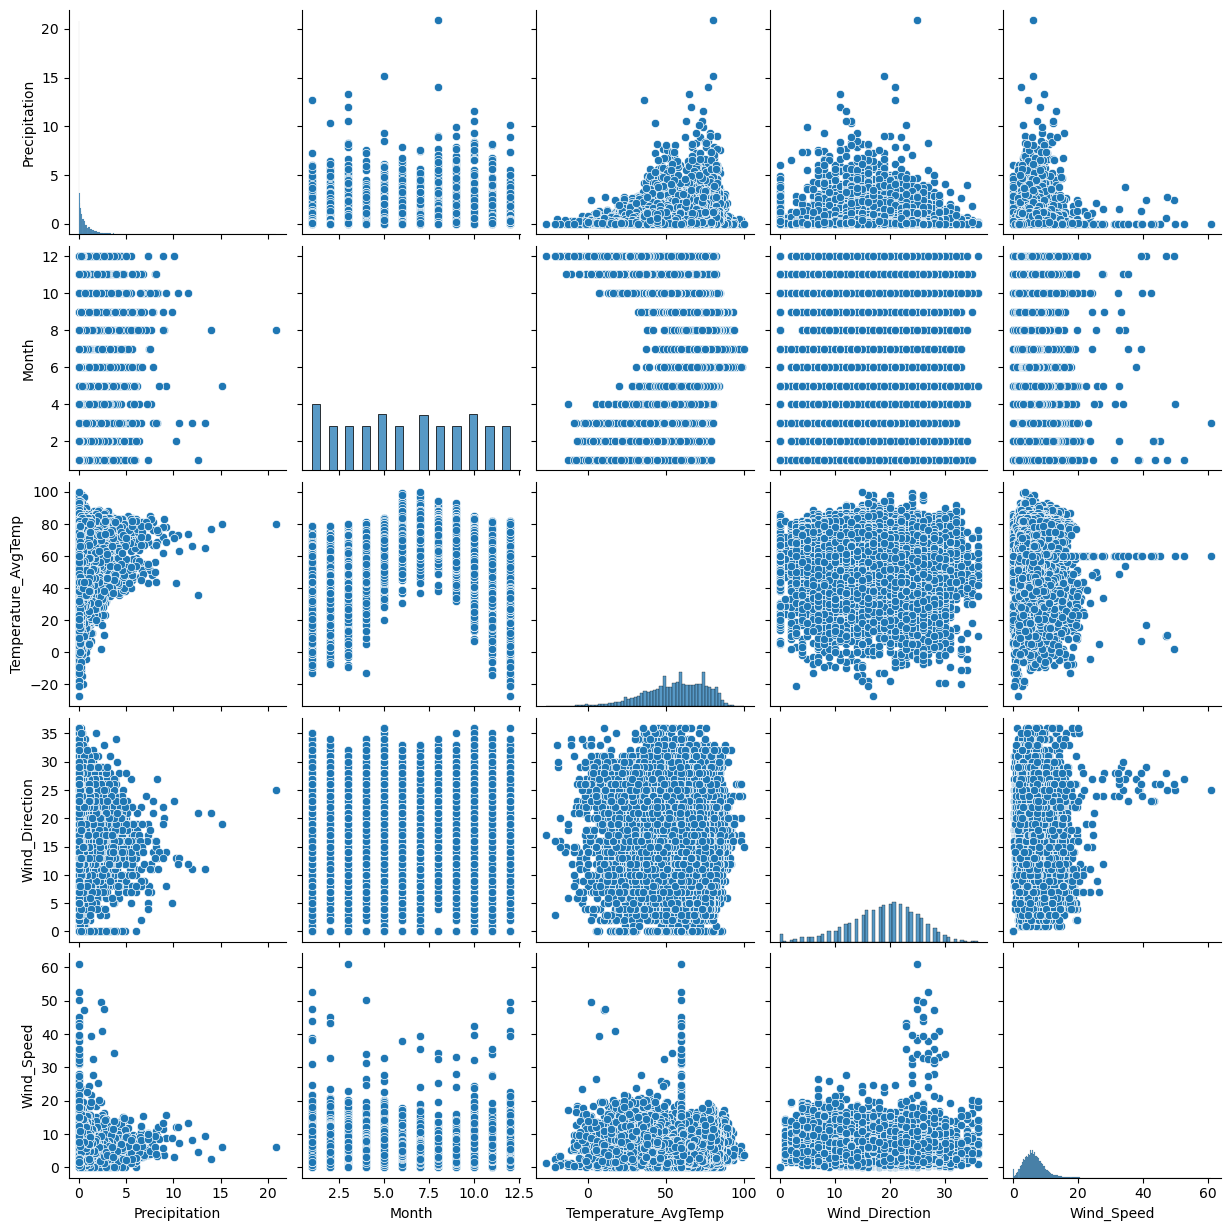

In [40]:
sns.pairplot(df)

In [51]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=123)
df_train

,Precipitation,Month,State,Temperature_AvgTemp,Wind_Direction,Wind_Speed
11813,0.41,9,Maine,59,24,5.22
15563,1.11,12,Georgia,45,22,7.17
12250,0.31,9,South Dakota,66,16,11.51
4476,0.50,4,California,65,31,3.70
2839,0.04,3,Alaska,30,20,3.61
...,...,...,...,...,...,...
96,0.00,1,Idaho,21,9,2.56
13435,0.02,10,Montana,44,19,6.64
7763,3.54,6,Nebraska,75,13,7.41
15377,0.09,12,Ohio,37,23,9.70


In [79]:
full_model = smf.ols(formula = 'Precipitation~Month+State+Temperature_AvgTemp+Wind_Direction+Wind_Speed', data = df_train).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Precipitation   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     16.10
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          2.86e-147
Time:                        04:00:17   Log-Likelihood:                -18493.
No. Observations:               13394   AIC:                         3.710e+04
Df Residuals:                   13337   BIC:                         3.753e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.6884      0.089      7.759      0.000       0.514       0.862
State[T.Alaska]            -0.1403      0.079     -1.775      0.076      -0.295       0.015
State[T.Arizona]           -0.6190      0.098     -6.289      0.000      -0.812      -0.426
State[T.Arkansas]          -0.2965      0.113     -2.613      0.009      -0.519      -0.074
State[T.California]        -0.3915      0.081     -4.855      0.000      -0.550      -0.233
State[T.Colorado]          -0.4938      0.095     -5.179      0.000      -0.681      -0.307
State[T.Connecticut]       -0.0685      0.125     -0.546      0.585      -0.314       0.177
State[T.DE]                -0.1091      0.166     -0.658      0.511      -0.434       0.216
State[T.Delaware]          -0.0656      0.160     -0.410      0.682      -0.379       0.248
State[T.Florida]            0.0370      0.085      0.434      0.665      -0.130       0.204
State[T.Georgia]           -0.0454      0.095     -0.478      0.633      -0.232       0.141
State[T.Hawaii]            -0.2858      0.101     -2.829      0.005      -0.484      -0.088
State[T.Idaho]             -0.4479      0.113     -3.973      0.000      -0.669      -0.227
State[T.Illinois]          -0.0972      0.095     -1.027      0.304      -0.283       0.088
State[T.Indiana]            0.0845      0.105      0.807      0.419      -0.121       0.290
State[T.Iowa]              -0.0447      0.098     -0.455      0.649      -0.237       0.148
State[T.Kansas]            -0.1715      0.096     -1.783      0.075      -0.360       0.017
State[T.Kentucky]           0.0758      0.099      0.767      0.443      -0.118       0.270
State[T.Louisiana]          0.3996      0.099      4.023      0.000       0.205       0.594
State[T.Maine]              0.0646      0.111      0.581      0.561      -0.153       0.282
State[T.Maryland]          -0.0496      0.128     -0.387      0.698      -0.301       0.201
State[T.Massachusetts]     -0.2817      0.114     -2.469      0.014      -0.505      -0.058
State[T.Michigan]          -0.1092      0.089     -1.233      0.218      -0.283       0.064
State[T.Minnesota]         -0.0510      0.099     -0.513      0.608      -0.246       0.144
State[T.Mississippi]        0.1640      0.092      1.786      0.074      -0.016       0.344
State[T.Missouri]          -0.0127      0.092     -0.138      0.890      -0.194       0.168
State[T.Montana]           -0.3812      0.086     -4.410      0.000      -0.551      -0.212
State[T.Nebraska]          -0.2882      0.091     -3.179      0.001      -0.466      -0.110
State[T.Nevada]            -0.5873      0.094     -6.217      0.000      -0.772      -0.402
State[T.New Hampshire]     -0.2599      0.134     -1.944      0.052      -0.522       0.002
State[T.New Jersey]        -0.0767      0.126  

In [76]:
full_model.fittedvalues.head()

11813    0.721544
15563    0.561188
12250    0.493020
4476     0.219685
2839     0.441380
dtype: float64

In [77]:
full_model.resid.head()

11813   -0.311544
15563    0.548812
12250   -0.183020
4476     0.280315
2839    -0.401380
dtype: float64

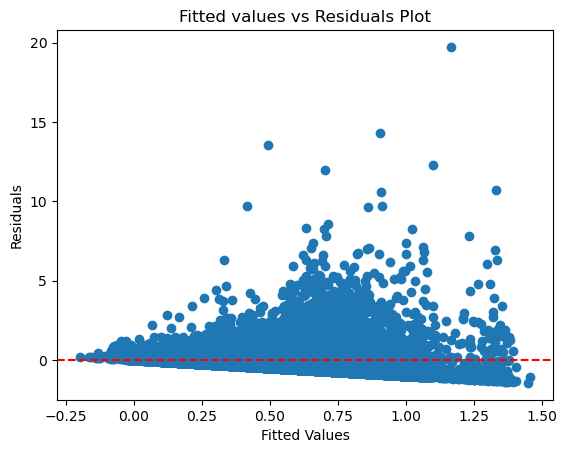

In [78]:
plt.scatter(full_model.fittedvalues, full_model.resid)
plt.axhline(y=0, color = 'r', linestyle= '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted values vs Residuals Plot')
plt.show()

I have reason to believe that my linear regression model may achieve a 
better fi  ifIu were to first transform one or more o myur variables imyucleanedED datas because it will be more interpretable which will yield better insights and model performance.et

In [93]:
train_x = df[['Precipitation','Temperature_AvgTemp','Wind_Direction','Wind_Speed']]
scaler_trainer = StandardScaler()
scaled_vars_train = scaler_trainer.fit_transform(train_x)
x_train = pd.DataFrame(scaled_vars_train, columns= train_x.columns)
x_train.head()

,Precipitation,Temperature_AvgTemp,Wind_Direction,Wind_Speed
0,-0.586107,-0.909105,2.199032,-0.572247
1,-0.586107,-0.909105,2.044266,-0.706737
2,-0.424169,-0.536720,2.508566,0.972959
3,-0.586107,-0.589918,2.044266,0.151710
4,-0.575986,-1.175094,0.032297,0.420691


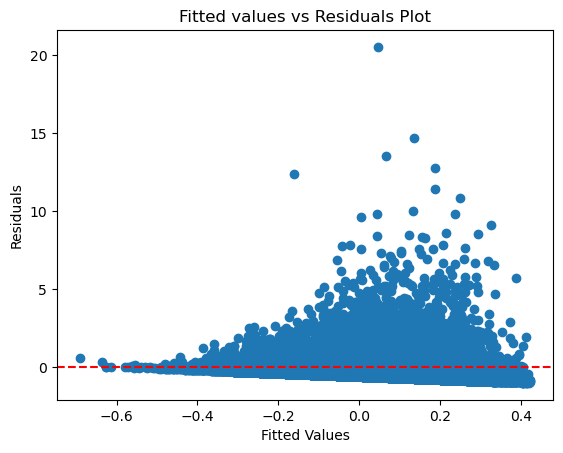

In [95]:
transform_model = smf.ols(formula = 'Precipitation~Temperature_AvgTemp+Wind_Direction+Wind_Speed', data = x_train).fit()
plt.scatter(transform_model.fittedvalues, transform_model.resid)
plt.axhline(y=0, color = 'r', linestyle= '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted values vs Residuals Plot')
plt.show()

Transforming the variables helped meet the linearity assumption by a small margin.

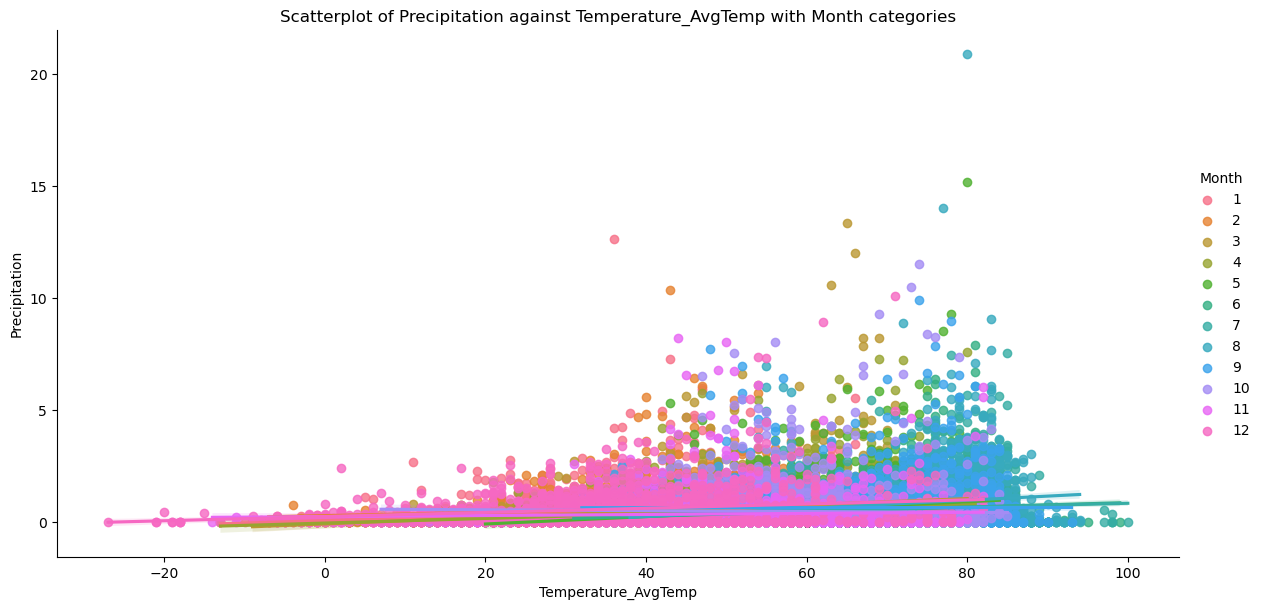

In [97]:
categorical_variable = 'Month'
numerical_variable = 'Temperature_AvgTemp'
sns.lmplot(x=numerical_variable, y='Precipitation', hue=categorical_variable, data=df, height=6, aspect=2)

# Set plot labels and title
plt.xlabel(numerical_variable)
plt.ylabel('Precipitation')
plt.title(f'Scatterplot of Precipitation against {numerical_variable} with {categorical_variable} categories')

# Show the plot
plt.show()

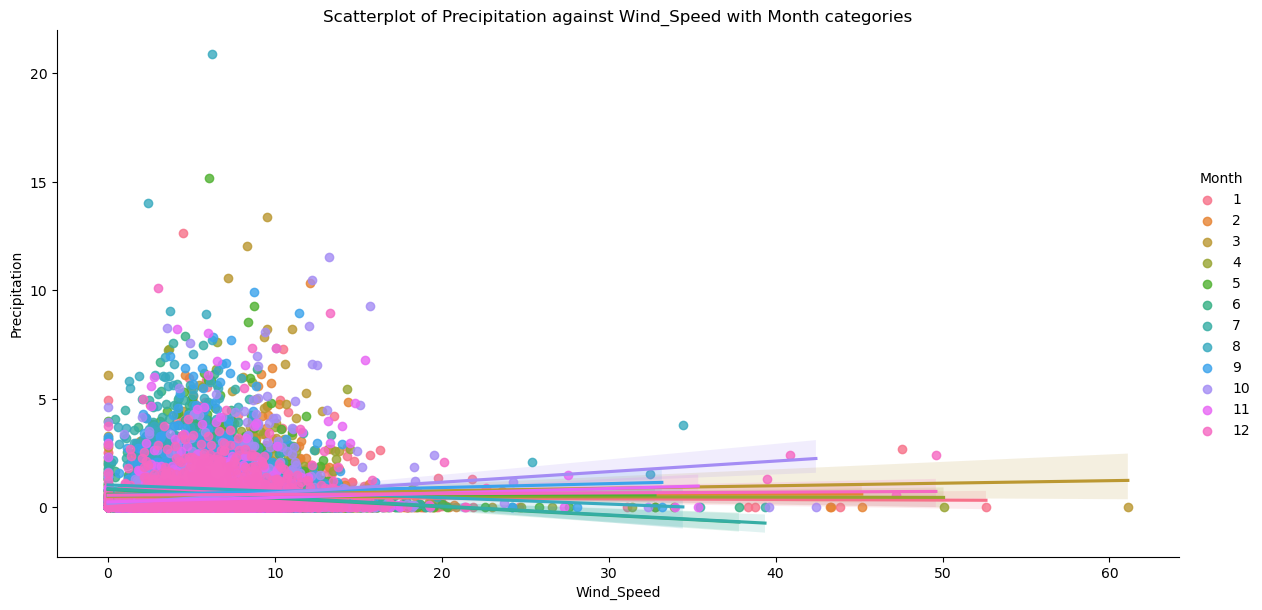

In [99]:
categorical_variable = 'Month'
numerical_variable = 'Wind_Speed'
sns.lmplot(x=numerical_variable, y='Precipitation', hue=categorical_variable, data=df, height=6, aspect=2)

# Set plot labels and title
plt.xlabel(numerical_variable)
plt.ylabel('Precipitation')
plt.title(f'Scatterplot of Precipitation against {numerical_variable} with {categorical_variable} categories')

# Show the plot
plt.show()

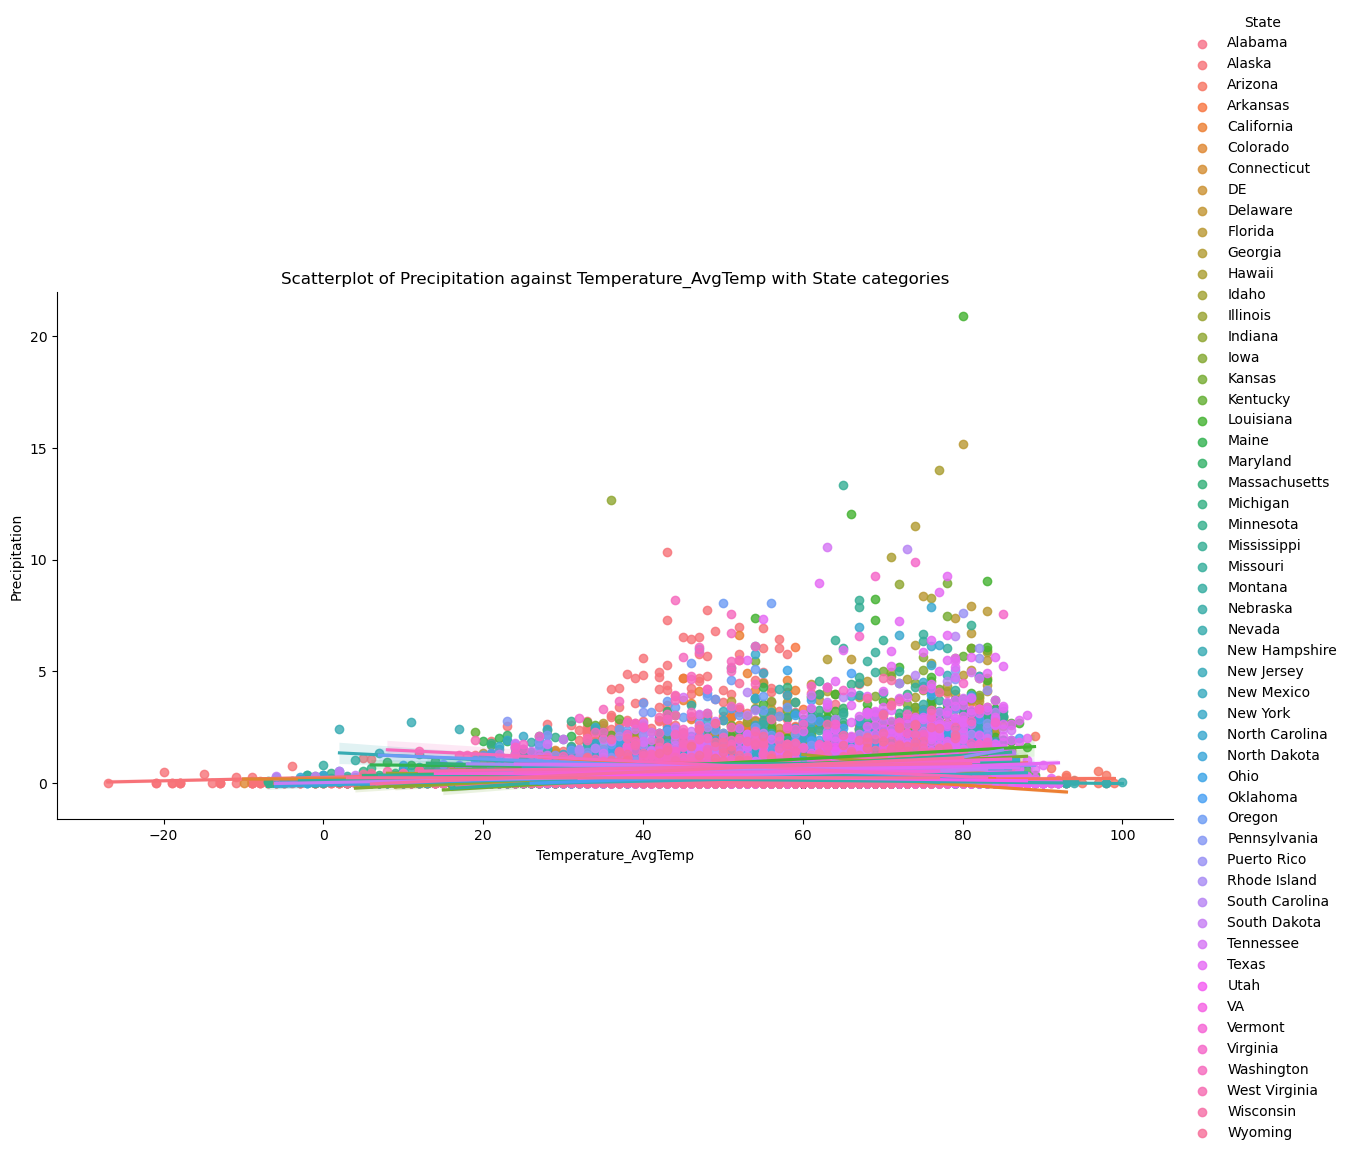

In [100]:
categorical_variable = 'State'
numerical_variable = 'Temperature_AvgTemp'
sns.lmplot(x=numerical_variable, y='Precipitation', hue=categorical_variable, data=df, height=6, aspect=2)

# Set plot labels and title
plt.xlabel(numerical_variable)
plt.ylabel('Precipitation')
plt.title(f'Scatterplot of Precipitation against {numerical_variable} with {categorical_variable} categories')

# Show the plot
plt.show()

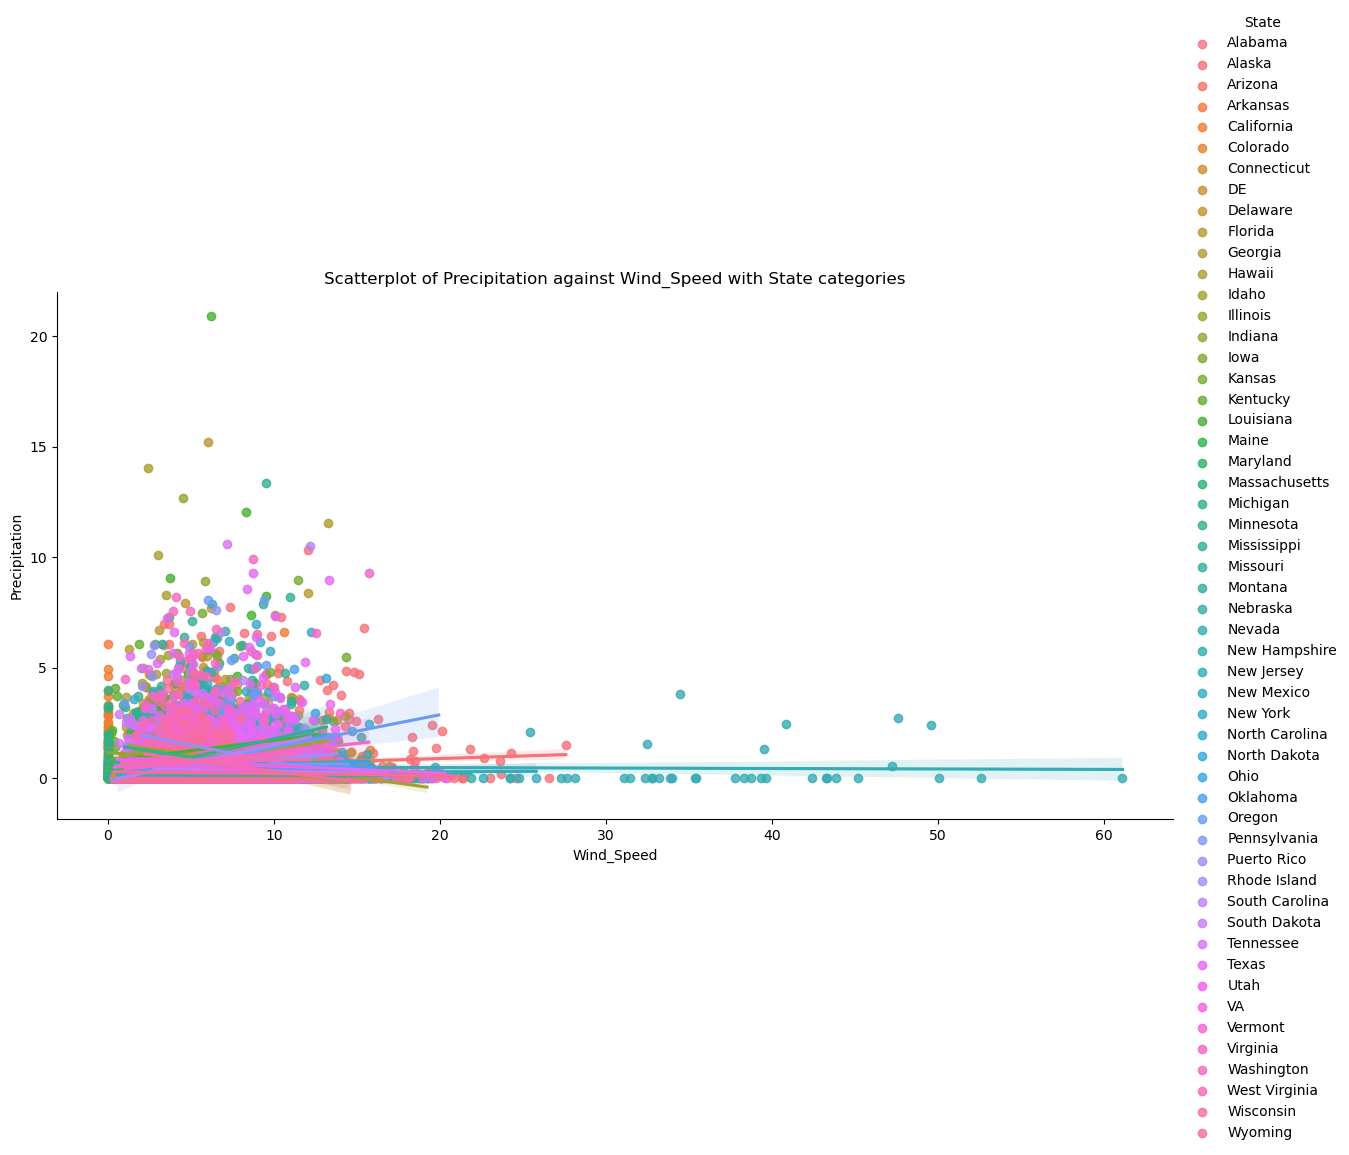

In [102]:
categorical_variable = 'State'
numerical_variable = 'Wind_Speed'
sns.lmplot(x=numerical_variable, y='Precipitation', hue=categorical_variable, data=df, height=6, aspect=2)

# Set plot labels and title
plt.xlabel(numerical_variable)
plt.ylabel('Precipitation')
plt.title(f'Scatterplot of Precipitation against {numerical_variable} with {categorical_variable} categories')

# Show the plot
plt.show()

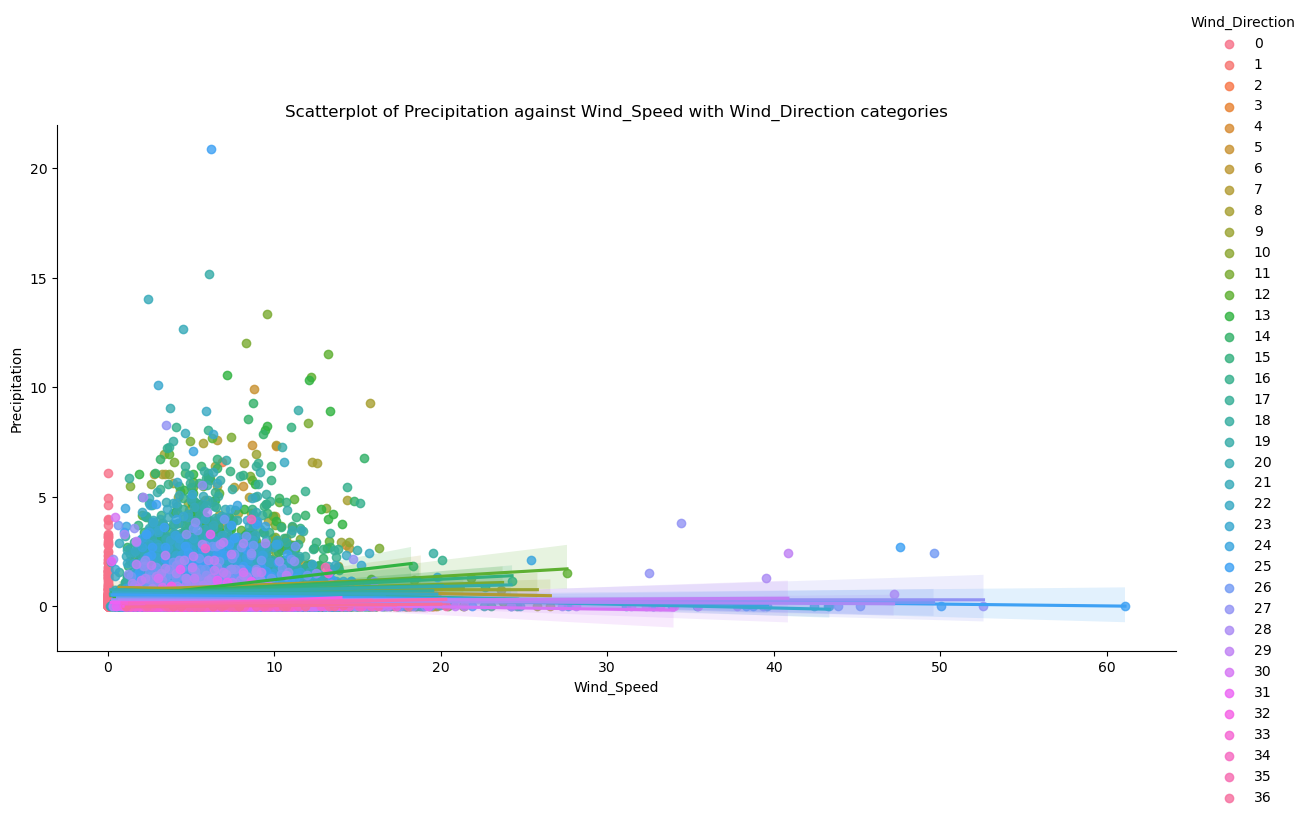

In [104]:
categorical_variable = 'Wind_Direction'
numerical_variable = 'Wind_Speed'
sns.lmplot(x=numerical_variable, y='Precipitation', hue=categorical_variable, data=df, height=6, aspect=2)

# Set plot labels and title
plt.xlabel(numerical_variable)
plt.ylabel('Precipitation')
plt.title(f'Scatterplot of Precipitation against {numerical_variable} with {categorical_variable} categories')

# Show the plot
plt.show()

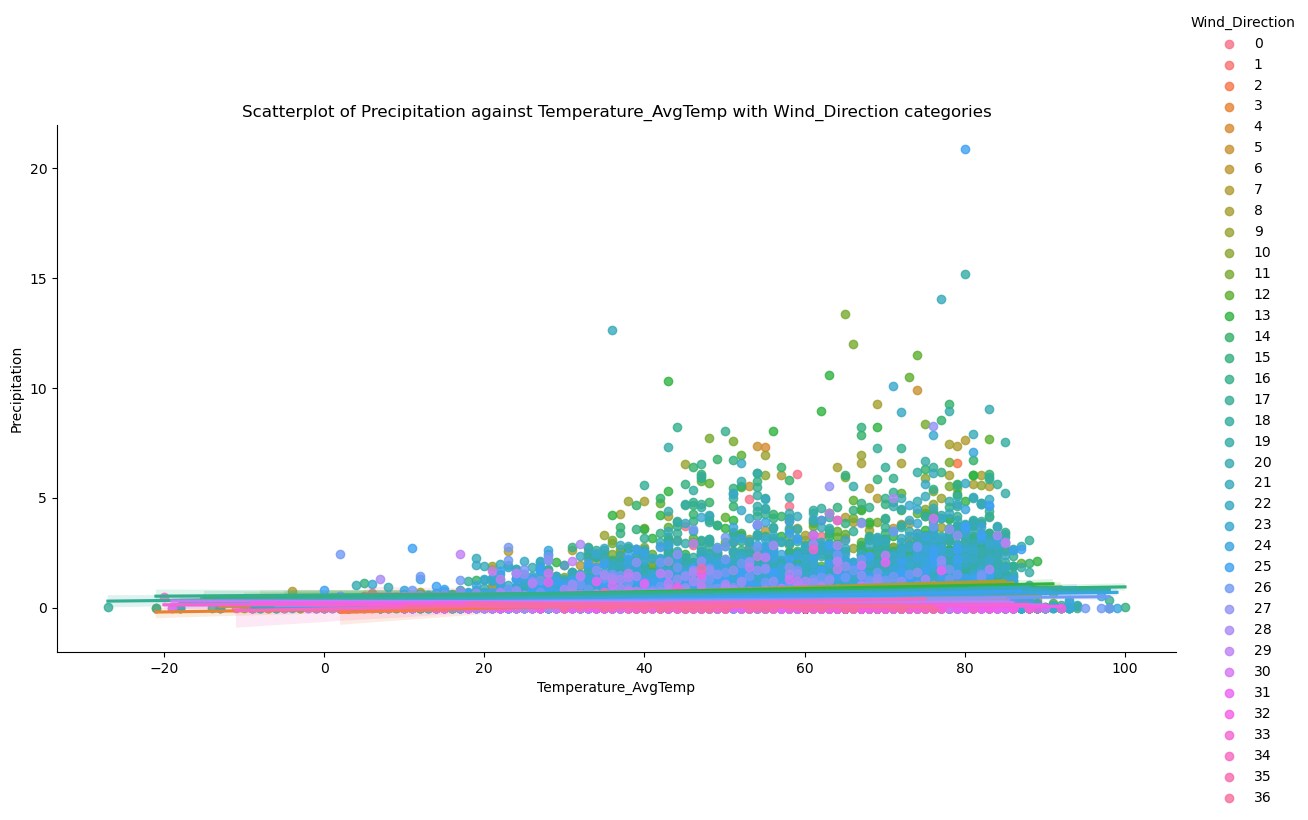

In [105]:
categorical_variable = 'Wind_Direction'
numerical_variable = 'Temperature_AvgTemp'
sns.lmplot(x=numerical_variable, y='Precipitation', hue=categorical_variable, data=df, height=6, aspect=2)

# Set plot labels and title
plt.xlabel(numerical_variable)
plt.ylabel('Precipitation')
plt.title(f'Scatterplot of Precipitation against {numerical_variable} with {categorical_variable} categories')

# Show the plot
plt.show()

The plot with Wind_Speed and Precipitation suggests that there is interaction with the State categorical variable because the plot shows lines of best fits not pointing in a similar direction but rather many directions.

## 5. Predictive Models

In [147]:
df_train1, df_test1 = train_test_split(df, test_size = 0.2)
df_train1

,Precipitation,Month,State,Temperature_AvgTemp,Wind_Direction,Wind_Speed
4659,2.12,4,Rhode Island,37,18,9.48
14821,0.00,11,Virginia,50,19,6.50
8515,0.07,7,West Virginia,70,11,2.86
12305,1.70,9,Wisconsin,65,16,5.38
13528,0.04,10,Tennessee,65,24,1.21
...,...,...,...,...,...,...
9560,0.15,7,Hawaii,82,5,14.05
1129,0.22,1,Nevada,25,20,8.01
16273,0.28,12,Missouri,39,14,7.70
11072,0.00,9,Alaska,56,11,5.85


In [148]:
train_x1 = df_train1[['Precipitation','Temperature_AvgTemp','Wind_Direction','Wind_Speed']]
train_y1 = df_train1['Precipitation']
scaler_trainer = StandardScaler()
scaled_vars_train1 = scaler_trainer.fit_transform(train_x1)
x_train1 = pd.DataFrame(scaled_vars_train1, columns= train_x1.columns)
x_train1.head()

,Precipitation,Temperature_AvgTemp,Wind_Direction,Wind_Speed
0,1.567686,-1.017008,-0.123876,0.909059
1,-0.585992,-0.323479,0.031160,0.049705
2,-0.514880,0.743487,-1.209127,-0.999976
3,1.141014,0.476745,-0.433948,-0.273274
4,-0.545356,0.476745,0.806339,-1.475792


In [149]:
test_x1 = df_test1[['Precipitation','Temperature_AvgTemp','Wind_Direction','Wind_Speed']]
test_y1 = df_test1['Precipitation']
scaled_vars_test1 = scaler_trainer.transform(test_x1)
x_test1 = pd.DataFrame(scaled_vars_test1, columns = test_x1.columns)
x_test1.head()

,Precipitation,Temperature_AvgTemp,Wind_Direction,Wind_Speed
0,0.450212,0.530094,0.186196,-0.495321
1,-0.585992,0.636790,0.496267,0.216962
2,-0.585992,0.423397,-0.588983,1.477155
3,0.094652,-0.003390,-0.744019,0.551475
4,2.004517,0.210004,0.031160,-1.063418


In [162]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(x_train1, train_y1)

LinearRegression()

In [151]:
lin_reg_mod.score(x_test1, test_y1)

1.0

In [160]:
non_reg_interact_model = smf.ols(formula = 'Precipitation ~ Month + State + Temperature_AvgTemp + Wind_Direction + Wind_Speed + Month:Temperature_AvgTemp + State:Wind_Speed'
, data=df_train).fit()

y_pred_test12 = non_reg_interact_model.predict(df_test1)
r2_test12 = r2_score(df_test1['Precipitation'], y_pred_test12)
r2_test12

0.10106653814456668

In [165]:
non_reg_interact_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Precipitation   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     12.48
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          4.25e-203
Time:                        07:24:59   Log-Likelihood:                -18278.
No. Observations:               13394   AIC:                         3.678e+04
Df Residuals:                   13284   BIC:                         3.760e+04
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.2724      0.195     -1.395      0.163      -0.655       0.110
State[T.Alaska]                        0.5428      0.191      2.840      0.005       0.168       0.917
State[T.Arizona]                       0.2650      0.245      1.083      0.279      -0.214       0.744
State[T.Arkansas]                      0.4044      0.232      1.740      0.082      -0.051       0.860
State[T.California]                    0.4860      0.196      2.485      0.013       0.103       0.869
State[T.Colorado]                      0.3184      0.240      1.327      0.185      -0.152       0.789
State[T.Connecticut]                   0.4724      0.382      1.238      0.216      -0.276       1.220
State[T.DE]                            0.7039      0.547      1.288      0.198      -0.368       1.776
State[T.Delaware]                      0.5312      0.502      1.057      0.290      -0.454       1.516
State[T.Florida]                       0.9766      0.219      4.470      0.000       0.548       1.405
State[T.Georgia]                       0.0742      0.235      0.316      0.752      -0.386       0.535
State[T.Hawaii]                        1.7125      0.232      7.377      0.000       1.257       2.168
State[T.Idaho]                         0.2265      0.263      0.862      0.389      -0.289       0.742
State[T.Illinois]                      1.2501      0.266      4.693      0.000       0.728       1.772
State[T.Indiana]                       1.1668      0.276      4.233      0.000       0.627       1.707
State[T.Iowa]                          1.3419      0.311      4.309      0.000       0.731       1.952
State[T.Kansas]                        0.7013      0.288      2.439      0.015       0.138       1.265
State[T.Kentucky]                      0.9337      0.231      4.045      0.000       0.481       1.386
State[T.Louisiana]                     0.6276      0.247      2.540      0.011       0.143       1.112
State[T.Maine]                         0.5841      0.354      1.651      0.099      -0.109       1.278
State[T.Maryland]                      0.6555      0.407      1.610      0.107      -0.143       1.454
State[T.Massachusetts]                 0.2385      0.364      0.656      0.512      -0.474       0.951
State[T.Michigan]                      0.6787      0.215      3.162      0.002       0.258       1.099
State[T.Minnesota]                     0.7297      0.282      2.587      0.010       0.177       1.283
State[T.Mississippi]                   0.1093      0.228      0.480      0.631      -0.337       0.555
State[T.Missouri]                      1.5701      0.265      5.919      0.000       1.050       2.090
State[T.Montana]                       0.4110      0.206      1.995      0.046       0.007      

Choosing to do Backwards Elimination Algorithm

In [129]:
#comparison test R^2
model1 = smf.ols(formula= 'Precipitation~Month+State+Temperature_AvgTemp+Wind_Direction+Wind_Speed', data = df_train1).fit()
y_pred_test1 = model1.predict(df_test1)
r2_test = r2_score(df_test1['Precipitation'], y_pred_test1)
r2_test

0.061795877826041345

In [134]:
#Remove Wind Speed
model2 = smf.ols(formula= 'Precipitation~Month+State+Temperature_AvgTemp+Wind_Direction', data = df_train1).fit()
y_pred_test2 = model2.predict(df_test1)
r2_test2 = r2_score(df_test1['Precipitation'], y_pred_test2)
r2_test2

0.06132423833348821

In [136]:
#Remove Wind Direction
model3 = smf.ols(formula= 'Precipitation~Month+State+Temperature_AvgTemp+Wind_Speed', data = df_train1).fit()
y_pred_test3 = model3.predict(df_test1)
r2_test3 = r2_score(df_test1['Precipitation'], y_pred_test3)
r2_test3

0.056877947447479094

In [137]:
#Remove Temperature_AvgTemp
model4 = smf.ols(formula= 'Precipitation~Month+State+Wind_Direction+Wind_Speed', data = df_train1).fit()
y_pred_test4 = model4.predict(df_test1)
r2_test4 = r2_score(df_test1['Precipitation'], y_pred_test4)
r2_test4

0.05662987962358701

In [138]:
#Remove State
model5 = smf.ols(formula= 'Precipitation~Month+Temperature_AvgTemp+Wind_Direction+Wind_Speed', data = df_train1).fit()
y_pred_test5 = model5.predict(df_test1)
r2_test5 = r2_score(df_test1['Precipitation'], y_pred_test5)
r2_test5

0.021098630834343934

In [139]:
#Remove Month
model6 = smf.ols(formula= 'Precipitation~State+Temperature_AvgTemp+Wind_Direction+Wind_Speed', data = df_train1).fit()
y_pred_test6 = model6.predict(df_test1)
r2_test6 = r2_score(df_test1['Precipitation'], y_pred_test6)
r2_test6

0.06286939710842832

In [141]:
# Narrow down by removing State 
# Remove Wind Speed
model7 = smf.ols(formula= 'Precipitation~Month+Temperature_AvgTemp+Wind_Direction', data = df_train1).fit()
y_pred_test7 = model7.predict(df_test1)
r2_test7 = r2_score(df_test1['Precipitation'], y_pred_test7)
r2_test7

0.021050298610986506

In [142]:
#Remove Wind Direction
model8 = smf.ols(formula= 'Precipitation~Month+Temperature_AvgTemp+Wind_Speed', data = df_train1).fit()
y_pred_test8 = model8.predict(df_test1)
r2_test8 = r2_score(df_test1['Precipitation'], y_pred_test8)
r2_test8

0.012214726077252047

In [143]:
#Remove Temperature_AvgTemp
model9 = smf.ols(formula= 'Precipitation~Month+Wind_Speed+Wind_Direction', data = df_train1).fit()
y_pred_test9 = model9.predict(df_test1)
r2_test9 = r2_score(df_test1['Precipitation'], y_pred_test9)
r2_test9

0.010887504993163155

In [144]:
#Remove Month
model10 = smf.ols(formula= 'Precipitation~Wind_Speed+Temperature_AvgTemp+Wind_Direction', data = df_train1).fit()
y_pred_test10 = model10.predict(df_test1)
r2_test10 = r2_score(df_test1['Precipitation'], y_pred_test10)
r2_test10
#Stop Backwards Elimination because Test R^2 isn't getting any better

0.02181710676684101

In [159]:
#Model 6 is our final model from the backwards elimination algorithm
model6 = smf.ols(formula= 'Precipitation~State+Temperature_AvgTemp+Wind_Direction+Wind_Speed', data = df_train1).fit()
y_pred_test6 = model6.predict(df_test1)
r2_test6 = r2_score(df_test1['Precipitation'], y_pred_test6)
r2_test6

0.06936108967562649

## 6. Best Model Discussion

Technically speaking, the non-regularized linear regression full model had the best test R^2 at 1.0 but this is suspiciously high and because of that I am inferring that there is some error with the model. Thus, I am voiding this model and going with the next best model which is the non-regularized linear regression full model with interaction terms that had a test r^2 of 0.10.

There are 50+ intercepts for this model because of the 50 states and the associated interaction terms in the model so it isn't feasible to write down the entire equation.

\begin{align*}
\hat{\text{Precipitation}} &= -0.2724 \\
&+ 0.5428 \times State_{Alaska} \\
&+ 0.2650 \times State_{Arizona} \\
.
.
.
&+ 0.0207 \times Month \\
&+ 0.0094 \times Temperature_AvgTemp \\
&- 0.0149 \times Wind_Direction \\
&+ 0.1718 \times Wind_Speed \\
&- 0.1488 \times Wind_Speed: State_{Alaska} \\
.
.
.
\end{align*}

Considering the score was 0.1 the fit of the best model was terrible for the test dataset. But this may be because of some overfitting due to the State variable which was seen as a culprit that brought the overall Test R^2 down. I do not believe multicollinearity issues exist because during my analysis of the pair plots there didn't seem to be any linear relationships between the explanatory variables. I can measure the magnitude of the slopes as indicating how important the 
corresponding explanatory variablse are when it comes to predictingmyr response variable in  
linear regression mod. I can use my linear regression equation to see how those slopes correspond when predicting the response variable. The explanatory variables from most important to least important are: month, wind_speed, wind_direction, temperature_avgtemp, and state.el

## 7. Conclusion

I would not recommend my best model to be used by the people I mentioned before in my introduction simply because I do not think my model has enough predictive power. I do know for sure that the model I chose for my best model will yield the highest possible test R^2 out of all the possible models I can make from this dataset because it had the highest test R^2 measured. If other models were chosen or made, I do not believe they would yield higher predictive power. Some other models or techniques I could have used for a more complete analysis would be trying a forward selection algorithm and a regularization method such as LASSO or ridge regression potentially. Creating and analyzing these models could've potentially yielded a better model than the best model currently chosen. The most major shortcoming from my analysis here is the fact that my best model is not yielding enough predictive power to be considered and effective predictive model. Thus, this best model would not meet our primary research goal of being good in predicting the response variable in new datasets. Although the primary research goal couldn't be met, insights for the secondary research goal were found. It was found that average temperature was one crucial explanatory variable when it came to predicting precipitation because when the backwards elimination algorithmn was done, it was observed that average temperature had relatively higher test R^2 even when other explanatory variables were taken out. Based on what I observed in my analysis, one idea I have for future work is to potentially use more numerical explanatory variables instead of categorical variables to have a more quantitative analysis approach. This would also allow me to conduct regularization model methods more easily as in less steps to take. 